In [1]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
#from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib
import matplotlib.patches as patches
import numpy
# local
sys.path.insert(1, os.path.join(sys.path[0], '../../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

In [2]:
#client = scaleout.make_dask_client("tls://localhost:8786")
#client

In [3]:
samples = []
bg_samples = [
    "TTJets",
]
for sample in bg_samples:
    samples += [sample]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=1)

In [4]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(client=client),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "2mu2e",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    #llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Warning: zero genAs objects found in this sample. Skipping.

Warning: zero genAs_toMu objects found in this sample. Skipping.

Warning: zero genAs_toE objects found in this sample. Skipping.

Not applying any obj cuts after LJ clustering for channel baseNoLj

Not applying any obj cuts after lj clustering for channel  baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
sqrt
  result = getattr(ufunc, method)(

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

Warning: cannot fill counter Gen As to muons. Skipping.

Warning: cannot fill counter Gen As to electrons. Skipping.

Warning: cannot fill counter Matched gen As to muons. Skipping.

Warning: cannot fill counter Matched gen As to electrons. Skipping.

In [5]:
out[samples[0]]["cutflow"]["4mu"].print_table(fraction=False, unweighted=False)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             46211.0      46211.0
PV filter                46132.0      46132.0
>=2 LJs                   1320.0       1317.0
4mu                          0.0          0.0


In [6]:
out[samples[0]]["cutflow"]["2mu2e"].print_table(fraction=False, unweighted=False)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             46211.0      46211.0
PV filter                46132.0      46132.0
>=2 LJs                   1320.0       1317.0
2mu2e                       37.0         37.0


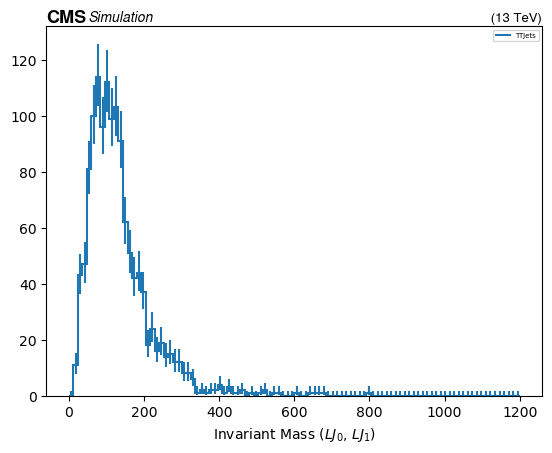

In [7]:
a = out[samples[0]]["hists"]["lj_lj_invmass"]["base", :]
utilities.plot(a, flow='none', density=False)
plt.legend([samples[0]], loc=1, prop={'size': 5}, ncol=2)

In [22]:
def plotCompare(hist, title, density=False, ch1="baseNoLj", ch2="2mu2e"):
    plt.subplots(1,2,figsize=(10,4))
    plt.subplot(1,2,1)
    a = out[samples[0]]["hists"][hist][ch1, :]
    utilities.plot(a, flow='none', density=density)
    plt.legend([samples[0]], loc=1, prop={'size': 5}, ncol=2)
    plt.title(f"Background Lj {title}, {ch1} Channel")
    plt.subplot(1,2,2)
    b = out[samples[0]]["hists"][hist][ch2, :]
    utilities.plot(b, flow='none', density=density)
    plt.legend([samples[0]], loc=1, prop={'size': 5}, ncol=2)
    plt.title(f"Background Lj {title}, {ch2} Channel")

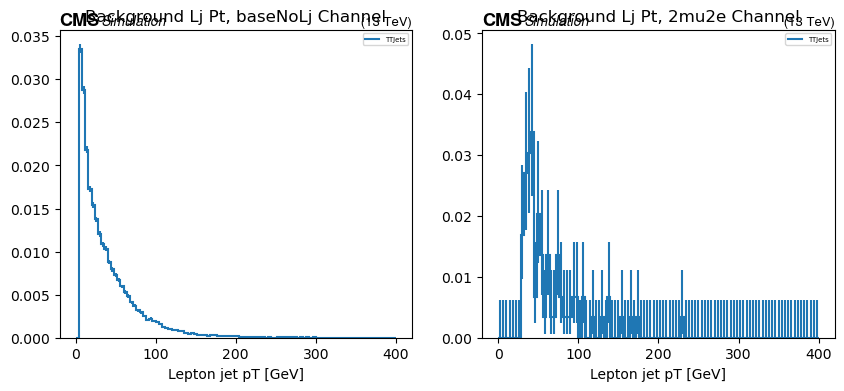

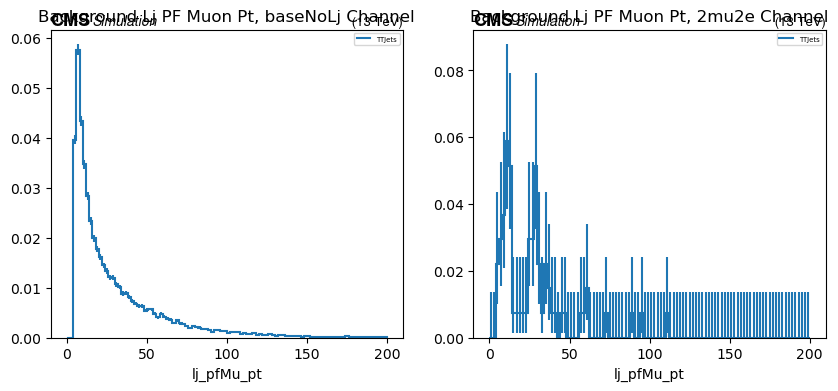

In [26]:
plotCompare("lj_pt", "Pt", density=True)
plotCompare("lj_pfMu_pt", "PF Muon Pt", density=True)

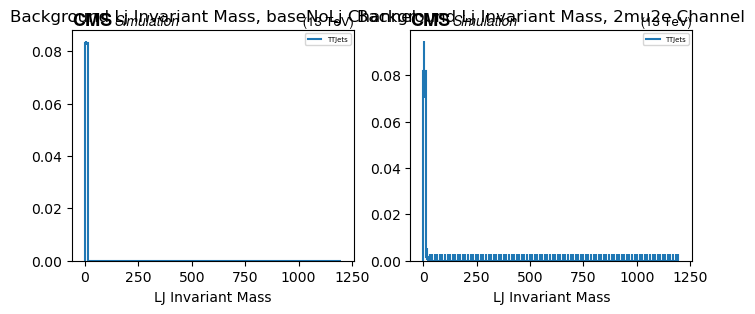

In [10]:
plotCompare("lj_invmass", "Invariant Mass", density=True)

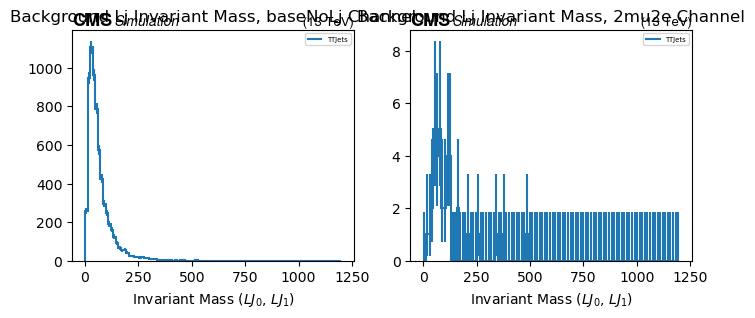

In [11]:
plotCompare("lj_lj_invmass", "Invariant Mass")

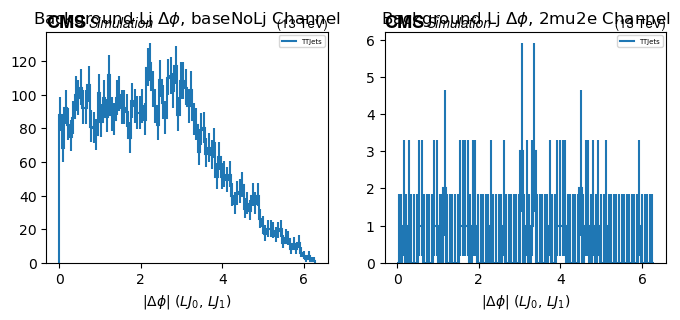

In [12]:
plotCompare("lj_lj_absdphi", "$\Delta\phi$")

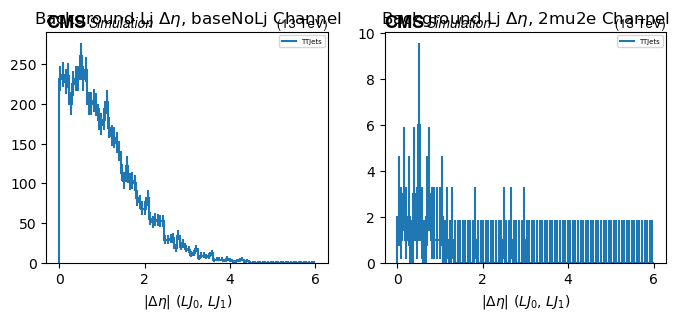

In [13]:
plotCompare("lj_lj_absdeta", "$\Delta\eta$")

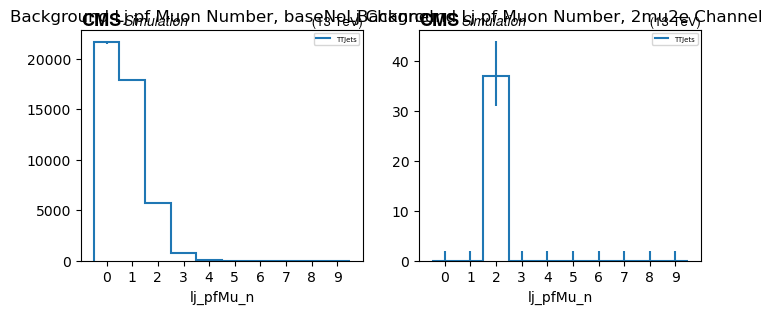

In [14]:
plotCompare("lj_pfMu_n", "pf Muon Number")

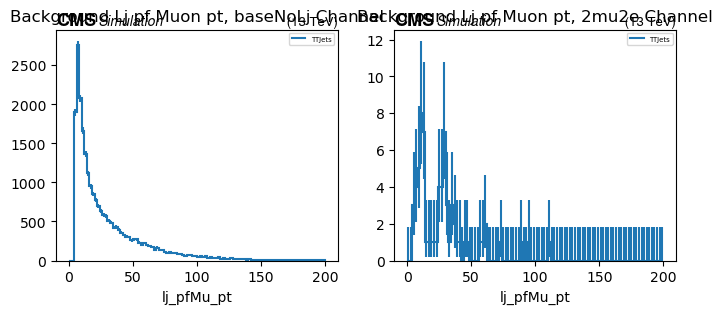

In [15]:
plotCompare("lj_pfMu_pt", "pf Muon pt")

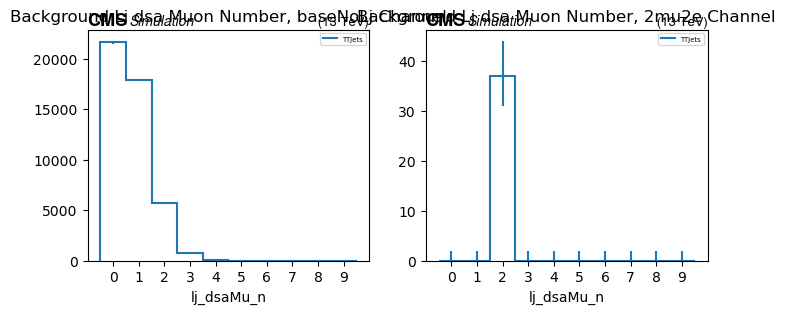

In [16]:
plotCompare("lj_dsaMu_n", "dsa Muon Number")

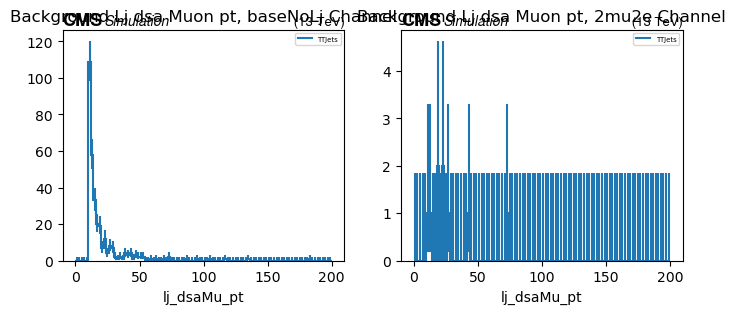

In [17]:
plotCompare("lj_dsaMu_pt", "dsa Muon pt")